In [ ]:
import json

from transformers import pipeline


def classify_emotions(comments) -> list[dict]:
    classifier = pipeline(
        "text-classification",
        model="blanchefort/rubert-base-cased-sentiment",
        tokenizer="blanchefort/rubert-base-cased-sentiment",
        truncation=True,
        max_length=512
    )
    THRESHOLD = 0.75
    result = []
    for comment in comments:
        classifier_result = classifier(comment["comment"])[0]
        result.append(
            {
                "login": comment["login"],
                "comment": comment["comment"],
                "emotion": classifier_result["label"] if classifier_result["score"] >= THRESHOLD else "NEUTRAL",
            }
        )

    return result


with open("data/comments.json") as fin:
    users_emotions = classify_emotions(json.load(fin)["users"])

In [42]:
import pandas as pd


df = pd.DataFrame(users_emotions)
negative_comments = df.loc[df["emotion"] == "NEGATIVE", ["login", "comment"]].reset_index(drop=True)
print(negative_comments)

                       login  \
0                 cuochiimei   
1                  Siestaman   
2                   mellonis   
3                   kino_rab   
4                  pewpewpaf   
5               Julia_Sedova   
6              Артмеланхолия   
7                    user123   
8          GoldMartin - 1988   
9   Станислав Чигарев - 2048   
10                  RoxannaN   
11        MariaKoryakina2004   
12            Viola Violkova   
13            Малих Альберто   
14     Данил Краморов - 3143   
15           Ян Жижка - 5809   
16            Maria_Tokareva   
17                  Skwidwar   
18                 nowifiplz   

                                              comment  
0   Существует множество списков с фильмами: фильм...  
1   Броско, ярко, модно Всё, что нужно знать о Суб...  
2   Всё испорчено. Интересная идея в Субстанции: м...  
3   Как «Субстанция» раскрывает тему обслуживающег...  
4   Трома XXI век Цепляющая идея, очень простой сц...  
5   Пустота, самоутрата

<Axes: xlabel='emotion', ylabel='percent'>

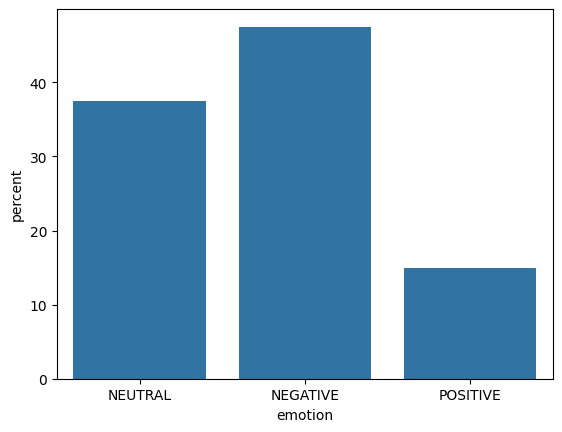

In [43]:
import seaborn as sns


sns.countplot(x="emotion", data=df, stat="percent")